# Grupo Fleury Dataset
Vou analizar os dados disponibilizados pelo Grupo Fleury, que são esses dos arquivos
- Grupo_Fleury_Dataset_Covid19_Resultados_Exames.csv
- Grupo_Fleury_Dataset_Covid19_Pacientes.csv

Primeiro vamos analizar o arquivo dos Pacientes do Covid 19 no grupo Fleury

In [2]:
import pandas as pd

In [2]:
pacientes = pd.read_csv('Grupo_Fleury_Dataset_Covid19_Pacientes.csv', sep='|')

In [3]:
pacientes.shape

(129596, 7)

Temos 129596 pacientes

In [4]:
pacientes.head()

,ID_PACIENTE,IC_SEXO,AA_NASCIMENTO,CD_PAIS,CD_UF,CD_MUNICIPIO,CD_CEP
0,1AD07C7A1E4D80B608DD7A650766CCF0,M,1961,Brasil,SP,SAO PAULO,CCCC
1,7B10786D64F27D7732503D915A38DE6F,M,1945,Brasil,SP,SAO PAULO,CCCC
2,83C018729869BB1BAB8819021D8E048E,F,1973,Brasil,SP,SAO PAULO,CCCC
3,74F422BB575BF224F676EE88DD77301F,M,2000,Brasil,SP,SAO PAULO,CCCC
4,3EDBAA8DBC42EE7F1CBBE2482B8CE42D,M,1972,Brasil,SP,SAO PAULO,CCCC


Será que temos registros duplicados, caso sim vamos a deletar os registros duplicados

In [8]:
!sort -u Grupo_Fleury_Dataset_Covid19_Pacientes.csv > Covid19_Pacientes.csv

Lemos o arquivo sem registros duplicados que é **Covid19_Pacientes.csv**

In [35]:
pacientes = pd.read_csv('Covid19_Pacientes.csv', sep='|')

In [36]:
pacientes.shape

(129596, 7)

Note-se que o numero de registros é igual do que o arquivo original, isto quer dizer que não se acharam registros duplicados. Porem o primeiro registro passou a ser header e o header passou a ser registro, vamos arrumar isto.

In [37]:
pacientes.tail(1)

,00007BB4274722A63A38D415ACCD7705,F,1955,Brasil,RJ,MMMM,CCCC
129595,ID_PACIENTE,IC_SEXO,AA_NASCIMENTO,CD_PAIS,CD_UF,CD_MUNICIPIO,CD_CEP


In [38]:
pacientes.head(1)

,00007BB4274722A63A38D415ACCD7705,F,1955,Brasil,RJ,MMMM,CCCC
0,000085C48A31F50AE4F147392F6F35CF,M,1972,Brasil,RJ,RIO DE JANEIRO,CCCC


In [39]:
col_names = ['ID_PACIENTE', 'IC_SEXO', 'AA_NASCIMENTO', 'CD_PAIS', 'CD_UF', 'CD_MUNICIPIO', 'CD_CEP']
pacientes = pd.read_csv('Covid19_Pacientes.csv', sep='|', names=col_names)

In [40]:
pacientes.head()

,ID_PACIENTE,IC_SEXO,AA_NASCIMENTO,CD_PAIS,CD_UF,CD_MUNICIPIO,CD_CEP
0,00007BB4274722A63A38D415ACCD7705,F,1955,Brasil,RJ,MMMM,CCCC
1,000085C48A31F50AE4F147392F6F35CF,M,1972,Brasil,RJ,RIO DE JANEIRO,CCCC
2,0000A150D4C8B92A4F8D280C6D4656B0,M,2020,Brasil,RJ,MMMM,CCCC
3,000230CE71238C85771268A5B7D807BC,F,1989,Brasil,RJ,MMMM,CCCC
4,0002632EFE862D6479C37F4E21AE33AB,M,1981,Brasil,SP,SAO PAULO,01455


e deletamos o ultimo registro

In [41]:
pacientes.tail(1)

,ID_PACIENTE,IC_SEXO,AA_NASCIMENTO,CD_PAIS,CD_UF,CD_MUNICIPIO,CD_CEP
129596,ID_PACIENTE,IC_SEXO,AA_NASCIMENTO,CD_PAIS,CD_UF,CD_MUNICIPIO,CD_CEP


In [42]:
pacientes.drop(pacientes.tail(1).index, inplace=True)

In [43]:
pacientes.shape

(129596, 7)

Analizamos as colunas

In [30]:
pacientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129596 entries, 0 to 129595
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   ID_PACIENTE    129596 non-null  object
 1   IC_SEXO        129596 non-null  object
 2   AA_NASCIMENTO  129596 non-null  object
 3   CD_PAIS        129596 non-null  object
 4   CD_UF          129596 non-null  object
 5   CD_MUNICIPIO   129596 non-null  object
 6   CD_CEP         129596 non-null  object
dtypes: object(7)
memory usage: 7.9+ MB


Cada registro tem 7 colunas com os datos descritos acima. No dicionario de dados está descrição de cada coluna.

**AA_NASCIMENTO** que é o ano de nascimento do Paciente, tem valores numericos exeto pelo string **AAAA**, segundo o dicionado de dados, esse é o valor asignado quando o ano de nascimento é igual ou anterior a 1930. Vou adicionar uma nova coluna no Dataframe que vai ser **idade** do paciente, que vai ser obtido segundo o ano de nascimento, quanto o ano for AAAA a idade do paciente deberia ser de pelo menos de 90 anos, pois estamos no ano 2020, porém vamos colocar de 95 anos que é a meia entre 90 e 100 anos.

In [45]:
def to_age(year):
    if year == 'AAAA': return 95
    else: return pd.Timestamp('now').year - int(year)
    
pacientes['idade'] = pacientes['AA_NASCIMENTO'].apply(to_age)

In [46]:
pacientes.head()

,ID_PACIENTE,IC_SEXO,AA_NASCIMENTO,CD_PAIS,CD_UF,CD_MUNICIPIO,CD_CEP,idade
0,00007BB4274722A63A38D415ACCD7705,F,1955,Brasil,RJ,MMMM,CCCC,65
1,000085C48A31F50AE4F147392F6F35CF,M,1972,Brasil,RJ,RIO DE JANEIRO,CCCC,48
2,0000A150D4C8B92A4F8D280C6D4656B0,M,2020,Brasil,RJ,MMMM,CCCC,0
3,000230CE71238C85771268A5B7D807BC,F,1989,Brasil,RJ,MMMM,CCCC,31
4,0002632EFE862D6479C37F4E21AE33AB,M,1981,Brasil,SP,SAO PAULO,01455,39


Analizando a varíavel **IC_SEXO**

In [47]:
pacientes['IC_SEXO'].unique()

array(['F', 'M'], dtype=object)

Vamos mapeiar esses valores para 0 caso for F e 1 caso for M

In [48]:
pacientes['IC_SEXO'] = pacientes['IC_SEXO'].map( {'F': 0, 'M': 1} ).astype(int)

In [49]:
pacientes.head()

,ID_PACIENTE,IC_SEXO,AA_NASCIMENTO,CD_PAIS,CD_UF,CD_MUNICIPIO,CD_CEP,idade
0,00007BB4274722A63A38D415ACCD7705,0,1955,Brasil,RJ,MMMM,CCCC,65
1,000085C48A31F50AE4F147392F6F35CF,1,1972,Brasil,RJ,RIO DE JANEIRO,CCCC,48
2,0000A150D4C8B92A4F8D280C6D4656B0,1,2020,Brasil,RJ,MMMM,CCCC,0
3,000230CE71238C85771268A5B7D807BC,0,1989,Brasil,RJ,MMMM,CCCC,31
4,0002632EFE862D6479C37F4E21AE33AB,1,1981,Brasil,SP,SAO PAULO,01455,39


In [50]:
pacientes['CD_PAIS'].unique()

array(['Brasil'], dtype=object)

Apenas tem um valor, essa coluna vai ser deletada

In [51]:
pacientes['CD_UF'].unique()

array(['RJ', 'SP', 'PE', 'BA', 'PR', 'RS', 'DF', 'MG', 'AM', 'PI', 'AL',
       'CE', 'RN', 'ES', 'PA', 'SC', 'GO', 'PB', 'MS', 'SE', 'AC', 'MA',
       'TO', 'MT', 'RO', 'AP'], dtype=object)

Mudamos o tipo de coluna do object para Categorical

In [53]:
pacientes.CD_UF = pd.Categorical(pacientes.CD_UF)

Asignamos codigos a cada valor categorico

In [54]:
pacientes['CD_UF_CODE'] = pacientes.CD_UF.cat.codes

In [55]:
pacientes.head()

,ID_PACIENTE,IC_SEXO,AA_NASCIMENTO,CD_PAIS,CD_UF,CD_MUNICIPIO,CD_CEP,idade,CD_UF_CODE
0,00007BB4274722A63A38D415ACCD7705,0,1955,Brasil,RJ,MMMM,CCCC,65,18
1,000085C48A31F50AE4F147392F6F35CF,1,1972,Brasil,RJ,RIO DE JANEIRO,CCCC,48,18
2,0000A150D4C8B92A4F8D280C6D4656B0,1,2020,Brasil,RJ,MMMM,CCCC,0,18
3,000230CE71238C85771268A5B7D807BC,0,1989,Brasil,RJ,MMMM,CCCC,31,18
4,0002632EFE862D6479C37F4E21AE33AB,1,1981,Brasil,SP,SAO PAULO,01455,39,24


In [56]:
pacientes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129596 entries, 0 to 129595
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype   
---  ------         --------------   -----   
 0   ID_PACIENTE    129596 non-null  object  
 1   IC_SEXO        129596 non-null  int64   
 2   AA_NASCIMENTO  129596 non-null  object  
 3   CD_PAIS        129596 non-null  object  
 4   CD_UF          129596 non-null  category
 5   CD_MUNICIPIO   129596 non-null  object  
 6   CD_CEP         129596 non-null  object  
 7   idade          129596 non-null  int64   
 8   CD_UF_CODE     129596 non-null  int8    
dtypes: category(1), int64(2), int8(1), object(5)
memory usage: 8.2+ MB


Seleção de varíaveis que não iremos utilizar, porque tem valores desconhecidos e outras que já utilizamos para extrair outro valor.

In [61]:
drop_colunas = ['AA_NASCIMENTO', 'CD_PAIS', 'CD_UF', 'CD_MUNICIPIO', 'CD_CEP']

In [62]:
pacientes = pacientes.drop(drop_colunas, axis=1)

In [63]:
pacientes.head()

,ID_PACIENTE,IC_SEXO,idade,CD_UF_CODE
0,00007BB4274722A63A38D415ACCD7705,0,65,18
1,000085C48A31F50AE4F147392F6F35CF,1,48,18
2,0000A150D4C8B92A4F8D280C6D4656B0,1,0,18
3,000230CE71238C85771268A5B7D807BC,0,31,18
4,0002632EFE862D6479C37F4E21AE33AB,1,39,24


Ficamos com essas columnas e salvamos num arquivo **Covid19_Pacientes_clean.csv**

In [64]:
pacientes.to_csv('Covid19_Pacientes_clean.csv', index=False, header=True)

## Analise do arquivo de resultados dos examenes dos pacientes
- Grupo_Fleury_Dataset_Covid19_Resultados_Exames.csv

In [3]:
resultados_exames = pd.read_csv('Grupo_Fleury_Dataset_Covid19_Resultados_Exames.csv', sep='|', encoding='latin-1')

In [4]:
resultados_exames.shape

(2496591, 8)

~2.5 milhões de registros de resutaldos dos examenes dos pacientes.

Podemos ter registros repetidos, para isso fazemos o seguinte para deletar os repetidos. 

In [5]:
!sort -u Grupo_Fleury_Dataset_Covid19_Resultados_Exames.csv > Covid19_Resultados_Exames.csv

Lemos o arquivo sem registros duplicados que é Covid19_Resultados_Exames.csv

In [104]:
resultados_exames = pd.read_csv('Covid19_Resultados_Exames.csv', sep='|', encoding='latin-1')

In [7]:
resultados_exames.shape

(2494613, 8)

Note-se que a quantidade de registros diminui em 1978, por tanto tinhamos 1978 registros redundantes. Aqui também acontece que os nomes de colunas passou a ser registro, arrumamos isso.

In [12]:
resultados_exames.tail(1)

,00007BB4274722A63A38D415ACCD7705,13/05/2020,LAB,"25 HIDROXI-VITAMINA D, soro",25 Hidroxi - vitamina D,78,ng/mL,Unnamed: 7
2494612,ID_PACIENTE,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,CD_UNIDADE,DE_VALOR_REFERENCIA


In [125]:
col_names = ['ID_PACIENTE', 'DT_COLETA', 'DE_ORIGEM', 'DE_EXAME', 'DE_ANALITO', 'DE_RESULTADO', 'CD_UNIDADE', 'DE_VALOR_REFERENCIA']
resultados_exames = pd.read_csv('Covid19_Resultados_Exames.csv', sep='|', names=col_names, encoding='latin-1')

In [126]:
resultados_exames.drop(resultados_exames.tail(1).index, inplace=True)

In [107]:
resultados_exames.head()

,ID_PACIENTE,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,CD_UNIDADE,DE_VALOR_REFERENCIA
0,00007BB4274722A63A38D415ACCD7705,13/05/2020,LAB,"25 HIDROXI-VITAMINA D, soro",25 Hidroxi - vitamina D,78,ng/mL,NaN
1,00007BB4274722A63A38D415ACCD7705,13/05/2020,LAB,"ACIDO FOLICO, soro",Ácido fólico - Eletroquimioluminescência,"18,6",ng/mL,"Superior a 3,9"
2,00007BB4274722A63A38D415ACCD7705,13/05/2020,LAB,"ACIDO URICO, soro","Ácido Úrico, soro","2,7",mg/dL,"2,4 a 5,7"
3,00007BB4274722A63A38D415ACCD7705,13/05/2020,LAB,"ALUMINIO, plasma",Alumínio,10,microg/L,Até 10
4,00007BB4274722A63A38D415ACCD7705,13/05/2020,LAB,"ANTICORPOS ANTI-PEROXIDASE TIROIDIANA, soro",Anticorpos Anti-Peroxidase Tiroidiana,inferior a 34,U/mL,inferior a 34


In [18]:
resultados_exames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2494613 entries, 0 to 2494612
Data columns (total 8 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   ID_PACIENTE          object
 1   DT_COLETA            object
 2   DE_ORIGEM            object
 3   DE_EXAME             object
 4   DE_ANALITO           object
 5   DE_RESULTADO         object
 6   CD_UNIDADE           object
 7   DE_VALOR_REFERENCIA  object
dtypes: object(8)
memory usage: 171.3+ MB


Vamos a calcular a densidade de cada exame e subtipo de exame, isto para ter uma noção da quantidade de vezes com que foi realizado cada exame, e poder usar ela como feature ou não.

In [40]:
exames_agrupados = resultados_exames[['DE_EXAME', 'DE_ANALITO']].groupby(['DE_EXAME', 'DE_ANALITO'])['DE_ANALITO'] \
                                             .count() \
                                             .reset_index(name="VEZES") \
                                             .sort_values(['VEZES'], ascending=False)

In [41]:
exames_agrupados

,DE_EXAME,DE_ANALITO,VEZES
277,"COVID19, ANTICORPOS IgG, soro","Covid 19, Anticorpos IgG, Quimiolumin.-Índice",84996
279,"COVID19, ANTICORPOS IgM, soro","Covid 19, Anticorpos IgM, Quimiolumin.-Índice",84986
278,"COVID19, ANTICORPOS IgG, soro","Covid 19, Anticorpos IgG, Quimioluminescência",83767
280,"COVID19, ANTICORPOS IgM, soro","Covid 19, Anticorpos IgM, Quimioluminescência",83753
797,"NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO P...","Covid 19, Detecção por PCR",50223
...,...,...,...
945,"QUANTIFICACAO DE INIBIDOR DE FATOR IX, plasma",Dosagem de fator IX,1
1141,"TRIAGEM DE ANFETAMINAS E METANFETAMINAS, urina","Anfetaminas e Metanfetaminas, urina",1
759,"MAG, ANTICORPOS, soro","MAG, anticorpos",1
852,PESQUISA DE MICROSPORIDIA NAS FEZES,"Microsporidia, pesquisa, fezes",1


Salvamos esse agrupamento de examenes num arquivo csv

In [43]:
exames_agrupados.to_csv(r'examens_agrupados.csv', index=False, sep='|')

Vamos analizar esses exames com detalhe.

Primeiro vamos analizar quais exames que não são importantes para poder modelar o problema. Olhamos na coluna do "DE_ANALITO", lá encontramos registros como:
- 'COVID 19, Material': descreve o material utilizado no PCR

Por tanto vamos deletar registros com esta informação

In [127]:
drop_DE_ANALITO = 'Covid 19, Material'

In [128]:
indexNames = resultados_exames[resultados_exames['DE_ANALITO'] == drop_DE_ANALITO].index
resultados_exames.drop(indexNames , inplace=True)

Também tem muito exame onde se analizam anticorpos IgG e IgM porém não são referentes ao COVID 19, exemplo:
- 'CITOMEGALOVIRUS, ANTICORPOS IgG, soro'  'CMV, IgG'
- 'CITOMEGALOVIRUS, ANTICORPOS IgM, soro'  'CMV, IgM'
- 'RUBEOLA, ANTICORPOS IgG, soro' 'Rubeola, IgG'
- 'RUBEOLA, ANTICORPOS IgM, soro' 'Rubeola, IgM'
- 'VIRUS EPSTEIN BARR (ANTIGENO DO CAPSIDEO VIRAL), ANTICORPOS IgM, soro' 'Epstein-Barr, IgM'
- 'VIRUS EPSTEIN BARR (ANTIGENO DO CAPSIDEO VIRAL), ANTICORPOS IgG, soro' 'Epstein-Barr, IgG'
- 'ZIKA VÍRUS, PESQUISA DE ANTICORPOS DA CLASSE IGM, soro' 'Zika vírus - IgM'
- 'ZIKA VÍRUS, PESQUISA DE ANTICORPOS DA CLASSE IGM, soro' 'Zika vírus - IgM - Índice'
- 'HERPES SIMPLEX, TIPO 1, ANTICORPOS IgG, soro' 'Herpes Simplex, Tipo 1, IgG'
- 'HERPES SIMPLEX, TIPO 2, ANTICORPOS IgG, soro' 'Herpes Simplex, Tipo 2, IgG'
- 'SARAMPO, ANTICORPOS IgG, soro' 'Sarampo, Anticorpos IgG'
- 'SARAMPO, ANTICORPOS IgM, soro' 'Sarampo, Anticorpos IgM'
- 'CHLAMYDIA TRACHOMATIS, ANTICORPOS IgG, soro' 'Chlamydia Trachomatis, IgG'
- 'CHLAMYDIA TRACHOMATIS, ANTICORPOS IgM, soro' 'Chlamydia Trachomatis, IgM'
- 'VARICELLA-ZOSTER VIRUS, ANTICORPOS IgG, soro' 'Varicella-Zoster, anticorpos IgG'
- 'VARICELLA-ZOSTER VIRUS, ANTICORPOS IgM, soro' 'Varicella-Zoster, anticorpos IgM'
- 'ZIKA VÍRUS, PESQUISA DE ANTICORPOS DA CLASSE IGG, soro'	'Zika vírus - IgG - Índice'
- 'ZIKA VÍRUS, PESQUISA DE ANTICORPOS DA CLASSE IGG, soro'	'Zika vírus - IgG'
- 'DENGUE, ANTICORPOS IgG, PROVA RÁPIDA, soro'	'Dengue, IgG'
- 'DENGUE, ANTICORPOS IgM, PROVA RÁPIDA, soro'	'Dengue, IgM
- 'DENGUE, ANTICORPOS IgG, soro'	'Dengue, IgG'
- 'DENGUE, ANTICORPOS IgM, soro'	'Dengue, IgM'
- 'HERPES SIMPLEX, TIPO  1 e 2, ANTICORPOS IgG, soro'	'Herpes Simplex, Tipo 1 e 2, IgG'
- 'HERPES SIMPLEX, TIPO 1 e 2, ANTICORPO IgM, soro'	'Herpes Simplex, Tipo 1 e 2, IgM'
- 'CAXUMBA, ANTICORPOS IgG, soro'	'Caxumba, IgG'
- 'CAXUMBA, ANTICORPOS IgM, soro'	'Caxumba, IgM
- 'HELICOBACTER PYLORI, ANTICORPOS IgG, soro'	'Helicobacter Pylori, IgG'
- 'ERITROVIRUS B19, ANTICORPOS IgM, soro'	'Eritrovírus B19, IgM'
- 'ANTICORPOS IgM CONTRA O VIRUS DA HEPATITE A (ANTI-VHA IgM)'	'Anti-VHA, IgM'
- 'ANTICORPO IgM CONTRA ANTIGENO DO CORE DO VIRUS DA HEPATITE B, soro'	'Anti-HBc, IgM'
- 'TOXOPLASMA, ANTICORPOS IgG, soro'	'Toxoplasma, IgG'
- 'TOXOPLASMA, ANTICORPOS IgM, soro'	'Toxoplasma, IgM'

Por tanto vamos a deletar esses registros que possam conter esses exames

In [129]:
drop_DE_EXAME = []
drop_DE_ANALITO = []

In [130]:
drop_DE_EXAME.append('CITOMEGALOVIRUS, ANTICORPOS IgG, soro')
drop_DE_ANALITO.append('CMV, IgG')
drop_DE_EXAME.append('CITOMEGALOVIRUS, ANTICORPOS IgM, soro')
drop_DE_ANALITO.append('CMV, IgM')

drop_DE_EXAME.append('RUBEOLA, ANTICORPOS IgG, soro')
drop_DE_ANALITO.append('Rubeola, IgG')
drop_DE_EXAME.append('RUBEOLA, ANTICORPOS IgM, soro')
drop_DE_ANALITO.append('Rubeola, IgM')

drop_DE_EXAME.append('VIRUS EPSTEIN BARR (ANTIGENO DO CAPSIDEO VIRAL), ANTICORPOS IgM, soro') 
drop_DE_ANALITO.append('Epstein-Barr, IgM')
drop_DE_EXAME.append('VIRUS EPSTEIN BARR (ANTIGENO DO CAPSIDEO VIRAL), ANTICORPOS IgG, soro')
drop_DE_ANALITO.append('Epstein-Barr, IgG')

drop_DE_EXAME.append('ZIKA VÍRUS, PESQUISA DE ANTICORPOS DA CLASSE IGM, soro')
drop_DE_ANALITO.append('Zika vírus - IgM')
drop_DE_EXAME.append('ZIKA VÍRUS, PESQUISA DE ANTICORPOS DA CLASSE IGM, soro')
drop_DE_ANALITO.append('Zika vírus - IgM - Índice')

drop_DE_EXAME.append('HERPES SIMPLEX, TIPO 1, ANTICORPOS IgG, soro')
drop_DE_ANALITO.append('Herpes Simplex, Tipo 1, IgG')
drop_DE_EXAME.append('HERPES SIMPLEX, TIPO 2, ANTICORPOS IgG, soro')
drop_DE_ANALITO.append('Herpes Simplex, Tipo 2, IgG')

drop_DE_EXAME.append('SARAMPO, ANTICORPOS IgG, soro') 
drop_DE_ANALITO.append('Sarampo, Anticorpos IgG')
drop_DE_EXAME.append('SARAMPO, ANTICORPOS IgM, soro') 
drop_DE_ANALITO.append('Sarampo, Anticorpos IgM')

drop_DE_EXAME.append('CHLAMYDIA TRACHOMATIS, ANTICORPOS IgG, soro') 
drop_DE_ANALITO.append('Chlamydia Trachomatis, IgG')
drop_DE_EXAME.append('CHLAMYDIA TRACHOMATIS, ANTICORPOS IgM, soro')
drop_DE_ANALITO.append('Chlamydia Trachomatis, IgM')

drop_DE_EXAME.append('VARICELLA-ZOSTER VIRUS, ANTICORPOS IgG, soro')
drop_DE_ANALITO.append('Varicella-Zoster, anticorpos IgG')
drop_DE_EXAME.append('VARICELLA-ZOSTER VIRUS, ANTICORPOS IgM, soro')
drop_DE_ANALITO.append('Varicella-Zoster, anticorpos IgM')

drop_DE_EXAME.append('ZIKA VÍRUS, PESQUISA DE ANTICORPOS DA CLASSE IGG, soro')
drop_DE_ANALITO.append('Zika vírus - IgG - Índice')
drop_DE_EXAME.append('ZIKA VÍRUS, PESQUISA DE ANTICORPOS DA CLASSE IGG, soro')
drop_DE_ANALITO.append('Zika vírus - IgG')

drop_DE_EXAME.append('DENGUE, ANTICORPOS IgG, PROVA RÁPIDA, soro')
drop_DE_ANALITO.append('Dengue, IgG')
drop_DE_EXAME.append('DENGUE, ANTICORPOS IgM, PROVA RÁPIDA, soro')
drop_DE_ANALITO.append('Dengue, IgM')

drop_DE_EXAME.append('DENGUE, ANTICORPOS IgG, soro')
drop_DE_ANALITO.append('Dengue, IgG')
drop_DE_EXAME.append('DENGUE, ANTICORPOS IgM, soro')
drop_DE_ANALITO.append('Dengue, IgM')

drop_DE_EXAME.append('HERPES SIMPLEX, TIPO  1 e 2, ANTICORPOS IgG, soro')
drop_DE_ANALITO.append('Herpes Simplex, Tipo 1 e 2, IgG')
drop_DE_EXAME.append('HERPES SIMPLEX, TIPO 1 e 2, ANTICORPO IgM, soro')
drop_DE_ANALITO.append('Herpes Simplex, Tipo 1 e 2, IgM')


drop_DE_EXAME.append('ENDOMISIO, ANTICORPOS IgG, soro')
drop_DE_ANALITO.append('Endomisio, Anticorpos IgG')

drop_DE_EXAME.append('CAXUMBA, ANTICORPOS IgG, soro')
drop_DE_ANALITO.append('Caxumba, IgG')
drop_DE_EXAME.append('CAXUMBA, ANTICORPOS IgM, soro')
drop_DE_ANALITO.append('Caxumba, IgM')


drop_DE_EXAME.append('HELICOBACTER PYLORI, ANTICORPOS IgG, soro')
drop_DE_ANALITO.append('Helicobacter Pylori, IgG')

drop_DE_EXAME.append('ERITROVIRUS B19, ANTICORPOS IgM, soro')
drop_DE_ANALITO.append('Eritrovírus B19, IgM')

drop_DE_EXAME.append('ANTICORPOS IgM CONTRA O VIRUS DA HEPATITE A (ANTI-VHA IgM)')
drop_DE_ANALITO.append('Anti-VHA, IgM')

drop_DE_EXAME.append('ANTICORPO IgM CONTRA ANTIGENO DO CORE DO VIRUS DA HEPATITE B, soro')
drop_DE_ANALITO.append('Anti-HBc, IgM')

drop_DE_EXAME.append('TOXOPLASMA, ANTICORPOS IgG, soro')
drop_DE_ANALITO.append('Toxoplasma, IgG')
drop_DE_EXAME.append('TOXOPLASMA, ANTICORPOS IgM, soro')
drop_DE_ANALITO.append('Toxoplasma, IgM')

In [115]:
indexNames

Int64Index([    371,     372,     401,     402,     403,     404,     409,
                410,     525,     526,
            ...
            2492184, 2492185, 2492190, 2492191, 2493511, 2493512, 2494539,
            2494540, 2494567, 2494568],
           dtype='int64', length=21121)

In [131]:
indexNames = resultados_exames[resultados_exames['DE_ANALITO'].isin(drop_DE_ANALITO)].index
resultados_exames.drop(indexNames , inplace=True)

In [132]:
resultados_exames.shape

(2420233, 8)

Também temos dados que representam a mesma coisa, pois tem o seu valor original e o valor normalizado dele na forma de porcentagem, exemplo:
<img src='covid_images/1.png'>

Vamos manter os valores normalizados e deletar os originais

In [133]:
index_deletar = ['Neutrófilos', 'Monócitos', 'Linfócitos', 'Basófilos', 'Eosinófilos', \
                 'Bastonetes', 'Reticulócitos', 'Metamielócitos', 'Mielócitos', \
                 'Promielócitos', 'Blastos', 'Plasmócitos']

In [134]:
indexNames = resultados_exames[resultados_exames['DE_ANALITO'].isin(index_deletar)].index
resultados_exames.drop(indexNames , inplace=True)

In [135]:
resultados_exames.shape

(2240474, 8)

In [73]:
resultados_exames.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2240474 entries, 0 to 2494611
Data columns (total 8 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   ID_PACIENTE          object
 1   DT_COLETA            object
 2   DE_ORIGEM            object
 3   DE_EXAME             object
 4   DE_ANALITO           object
 5   DE_RESULTADO         object
 6   CD_UNIDADE           object
 7   DE_VALOR_REFERENCIA  object
dtypes: object(8)
memory usage: 153.8+ MB


## Analise dos labels referentes ao COVID

### PCR
Tem muitos teste de PCR, porém para gente interessa o PCR relacionado com COVID19.

Exame relacionado com isso:
- DE_ANALITO: 'Covid 19, Detecção por PCR' tem 50223 ocorrencias

Vamos analizar o resultado desse teste

In [136]:
resultados_exames[resultados_exames['DE_ANALITO'] == 'Covid 19, Detecção por PCR']['DE_RESULTADO'].unique()

array(['NÃO DETECTADO', 'NÃO DETECTADO (NEGATIVO)',
       'DETECTADO (POSITIVO)', 'DETECTADO', 'Inconclusivo ',
       'Inconclusivo', 'INCONCLUSIVO', 'INCONCLUSIVO '], dtype=object)

In [137]:
resultados_exames[resultados_exames['DE_ANALITO'] == 'Covid 19, Detecção por PCR']['DE_RESULTADO'].value_counts()

NÃO DETECTADO               19285
NÃO DETECTADO (NEGATIVO)    18287
DETECTADO                    8159
DETECTADO (POSITIVO)         4362
Inconclusivo                   48
INCONCLUSIVO                   41
Inconclusivo                   40
INCONCLUSIVO                    1
Name: DE_RESULTADO, dtype: int64

Vamos deletar os resultados **Inconclusivos**, que no total são 130, pois é uma pequena quantidade em relação no total.

In [140]:
resultados_deletar = ['Inconclusivo ', 'Inconclusivo', 'INCONCLUSIVO', 'INCONCLUSIVO ']

In [141]:
index_covid = resultados_exames.loc[resultados_exames['DE_ANALITO'] == 'Covid 19, Detecção por PCR', 'DE_RESULTADO']

In [151]:
index_to_delete = index_covid[index_covid.isin(resultados_deletar) == True].index

In [152]:
resultados_exames.drop(index_to_delete , inplace=True)

In [153]:
resultados_exames[resultados_exames['DE_ANALITO'] == 'Covid 19, Detecção por PCR']['DE_RESULTADO'].unique()

array(['NÃO DETECTADO', 'NÃO DETECTADO (NEGATIVO)',
       'DETECTADO (POSITIVO)', 'DETECTADO'], dtype=object)

Agora temos 4 tipos de respostas redundantes, vamos converter apenas para uma resposta binaria, onde:
- 1 -> positivo/detectado
- 0 -> não detetado/negativo

In [154]:
index_covid_pcr = resultados_exames.loc[resultados_exames['DE_ANALITO'] == 'Covid 19, Detecção por PCR', 'DE_RESULTADO']

In [155]:
index_covid_pcr.replace({'NÃO DETECTADO': 0, \
                     'NÃO DETECTADO (NEGATIVO)': 0, \
                     'DETECTADO (POSITIVO)': 1, \
                     'DETECTADO': 1}, inplace=True) 

In [157]:
resultados_exames.loc[index_covid_pcr.index, 'DE_RESULTADO'] = index_covid_pcr.values

In [158]:
resultados_exames[resultados_exames['DE_ANALITO'] == 'Covid 19, Detecção por PCR']['DE_RESULTADO'].unique()

array([0, 1], dtype=object)

Note-se que temos mais exames COVID19 PCR negativos do que positivos, por tanto, os dados estão desbalanceados

In [159]:
resultados_exames[resultados_exames['DE_ANALITO'] == 'Covid 19, Detecção por PCR']['DE_RESULTADO'].value_counts()

0    37572
1    12521
Name: DE_RESULTADO, dtype: int64

### IgG
Vamos listar os exames relacionados com IgG apenas para COVID19
- 'COVID19, ANTICORPOS IgG, soro'	'Covid 19, Anticorpos IgG, Quimiolumin.-Índice'
- 'COVID19, ANTICORPOS IgG, soro'	'Covid 19, Anticorpos IgG, Quimioluminescência'
- 'COVID19, ANTICORPOS IgG, soro'	'Covid 19, Anticorpos IgG, Elisa - Índice'
- 'COVID19, ANTICORPOS IgG, soro'	'Covid 19, Anticorpos IgG, Elisa'


- 'SARS-CoV-2, ANTICORPOS IgM E IgG, TESTE RÁPIDO'	'Covid 19, Antic IgM/IgG, teste rápido-Observ'

SARS-CoV-2, ANTICORPOS IgM E IgG, TESTE RÁPIDO	Covid 19, Anticorpos IgG, teste rápido

SARS-COV-2, ANTICORPOS IgG, soro	Covid 19, Anticorpos IgG, Elisa - Índice
SARS-COV-2, ANTICORPOS IgG, soro	Covid 19, Anticorpos IgG, Elisa

Quando analizamos esses exames, por exemplo
- 'COVID19, ANTICORPOS IgG, soro' 'Covid 19, Anticorpos IgG, Quimiolumin.-Índice'
- 'COVID19, ANTICORPOS IgG, soro' 'Covid 19, Anticorpos IgG, Quimioluminescência'

Notamos que ambos quem dizer a mesma coisa, pois **'Covid 19, Anticorpos IgG, Quimiolumin.-Índice'** é o valor original do resultado, enquanto que **'Covid 19, Anticorpos IgG, Quimioluminescência** aplica um umbral de 0.8 a esse valor original do exame anterior, se ele for inferior do 0,8, o resultado deste exame é NÂO REAGENTE, caso contrario é REAGENTE. Note-se que também existem valores de Indeterminado, o qual deletaremos mais pra frente, pois não fica claro porque que fica assim, ademas disso tem poucos registros com esse estado.

In [163]:
drop_DE_ANALITO = 'Covid 19, Anticorpos IgG, Quimiolumin.-Índice'

In [164]:
indexNames = resultados_exames[resultados_exames['DE_ANALITO'] == drop_DE_ANALITO].index
resultados_exames.drop(indexNames , inplace=True)

In [165]:
resultados_exames[resultados_exames['DE_ANALITO'] == 'Covid 19, Anticorpos IgG, Quimioluminescência']['DE_RESULTADO'].value_counts()

NÃO REAGENTE     73795
REAGENTE          7894
Indeterminado     2078
Name: DE_RESULTADO, dtype: int64

Deletamos os registros indeterminados, pois não fica claro, quando que acaba sendo indeterminado.

In [168]:
resultados_deletar = ['Indeterminado']
index_igg_indeterminado = resultados_exames.loc[resultados_exames['DE_ANALITO'] == 'Covid 19, Anticorpos IgG, Quimioluminescência', 'DE_RESULTADO']
index_to_delete = index_igg_indeterminado[index_igg_indeterminado.isin(resultados_deletar) == True].index
resultados_exames.drop(index_to_delete , inplace=True)

In [169]:
resultados_exames[resultados_exames['DE_ANALITO'] == 'Covid 19, Anticorpos IgG, Quimioluminescência']['DE_RESULTADO'].value_counts()

NÃO REAGENTE    73795
REAGENTE         7894
Name: DE_RESULTADO, dtype: int64

In [99]:
group_DE_EXAME = resultados_exames.groupby(['DE_EXAME', 'DE_ANALITO'])
group_DE_EXAME.get_group('COVID19, ANTICORPOS IgG, soro')

,ID_PACIENTE,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,CD_UNIDADE,DE_VALOR_REFERENCIA
71,00007BB4274722A63A38D415ACCD7705,15/05/2020,LAB,"COVID19, ANTICORPOS IgG, soro","Covid 19, Anticorpos IgG, Quimioluminescência",NÃO REAGENTE,NaN,Não reagente
72,00007BB4274722A63A38D415ACCD7705,15/05/2020,LAB,"COVID19, ANTICORPOS IgG, soro","Covid 19, Anticorpos IgG, Quimiolumin.-Índice","0,1",UA/mL,"inferior a 0,8"
350,0000A150D4C8B92A4F8D280C6D4656B0,19/05/2020,LAB,"COVID19, ANTICORPOS IgG, soro","Covid 19, Anticorpos IgG, Quimioluminescência",Indeterminado,NaN,Não reagente
351,0000A150D4C8B92A4F8D280C6D4656B0,19/05/2020,LAB,"COVID19, ANTICORPOS IgG, soro","Covid 19, Anticorpos IgG, Quimiolumin.-Índice","1,3",UA/mL,"inferior a 0,8"
354,000230CE71238C85771268A5B7D807BC,19/05/2020,LAB,"COVID19, ANTICORPOS IgG, soro","Covid 19, Anticorpos IgG, Quimioluminescência",REAGENTE,NaN,Não reagente
...,...,...,...,...,...,...,...,...
2494596,FFFEDE2AD60338139A0CEB7019D1B687,05/06/2020,LAB,"COVID19, ANTICORPOS IgG, soro","Covid 19, Anticorpos IgG, Quimiolumin.-Índice","0,1",UA/mL,"inferior a 0,8"
2494601,FFFEF2D4D69B8D55ED11FFB5E0DD661D,13/06/2020,LAB,"COVID19, ANTICORPOS IgG, soro","Covid 19, Anticorpos IgG, Quimioluminescência",NÃO REAGENTE,NaN,Não reagente
2494602,FFFEF2D4D69B8D55ED11FFB5E0DD661D,13/06/2020,LAB,"COVID19, ANTICORPOS IgG, soro","Covid 19, Anticorpos IgG, Quimiolumin.-Índice","0,1",UA/mL,"inferior a 0,8"
2494605,FFFFD7BD5939EF03FA62545752DF57D9,04/06/2020,LAB,"COVID19, ANTICORPOS IgG, soro","Covid 19, Anticorpos IgG, Quimioluminescência",NÃO REAGENTE,NaN,Não reagente


In [162]:
resultados_exames[resultados_exames['DE_ANALITO'] == 'Covid 19, Anticorpos IgG, Quimioluminescência']['DE_RESULTADO'].value_counts()

NÃO REAGENTE     73795
REAGENTE          7894
Indeterminado     2078
Name: DE_RESULTADO, dtype: int64

### IgM
COVID19, ANTICORPOS IgM, soro	Covid 19, Anticorpos IgM, Quimiolumin.-Índice
COVID19, ANTICORPOS IgM, soro	Covid 19, Anticorpos IgM, Quimioluminescência

'SARS-CoV-2, ANTICORPOS IgM E IgG, TESTE RÁPIDO'	'Covid 19, Anticorpos IgM, teste rápido'

SARS-CoV-2, ANTICORPOS IgM E IgG, TESTE RÁPIDO'	'Covid 19,Antic IgM/IgG,teste rápido-Interpret


Tambem tem anticorpos IgA, que aparecem apos os anticorpos IgM e IgG
COVID19, ANTICORPOS IgA, soro	Covid 19, Anticorpos IgA, Elisa - Índice
COVID19, ANTICORPOS IgA, soro	Covid 19, Anticorpos IgA, Elisa

SARS-COV-2, ANTICORPOS IgG, soro	Covid 19, Anticorpos IgA, Elisa - Índice
SARS-COV-2, ANTICORPOS IgG, soro	Covid 19, Anticorpos IgA, Elisa
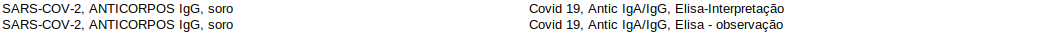
SARS-COV-2, ANTICORPOS IgG, soro	Covid 19, Antic IgA/IgG, Elisa-Interpretação
SARS-COV-2, ANTICORPOS IgG, soro	Covid 19, Antic IgA/IgG, Elisa - observação
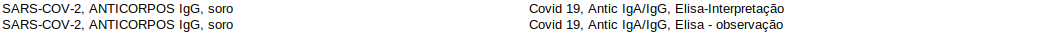



In [80]:
resultados_exames[resultados_exames['DE_ANALITO'] == 'Covid 19, Detecção por PCR'] \
                 ['DE_RESULTADO'].replace({'NÃO DETECTADO': 0, \
                                           'NÃO DETECTADO (NEGATIVO)': 0, \
                                           'DETECTADO (POSITIVO)': 1, \
                                           'DETECTADO': 1, \
                                           'Inconclusivo ': 0, \
                                           'Inconclusivo': 0, \
                                           'INCONCLUSIVO': 0, \
                                           'INCONCLUSIVO ': 0}, inplace=True) 

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [ ]:
resultados_exames.loc[resultados_exames['DE_ANALITO'] == 'Covid 19, Detecção por PCR', 'DE_RESULTADO'] = .replace({'NÃO DETECTADO': 0, \
                                           'NÃO DETECTADO (NEGATIVO)': 0, \
                                           'DETECTADO (POSITIVO)': 1, \
                                           'DETECTADO': 1, \
                                           'Inconclusivo ': 0, \
                                           'Inconclusivo': 0, \
                                           'INCONCLUSIVO': 0, \
                                           'INCONCLUSIVO ': 0}, inplace=True) 

In [84]:
resultados_exames[resultados_exames['DE_ANALITO'] == 'Covid 19, Detecção por PCR']['DE_RESULTADO'].unique()

array(['NÃO DETECTADO', 'NÃO DETECTADO (NEGATIVO)',
       'DETECTADO (POSITIVO)', 'DETECTADO', 'Inconclusivo ',
       'Inconclusivo', 'INCONCLUSIVO', 'INCONCLUSIVO '], dtype=object)

In [17]:
paciente_exame = feury_exames.groupby('ID_PACIENTE')

In [18]:
paciente_exame.get_group('1AD07C7A1E4D80B608DD7A650766CCF0')

,ID_PACIENTE,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,CD_UNIDADE,DE_VALOR_REFERENCIA
0,1AD07C7A1E4D80B608DD7A650766CCF0,19/03/2020,LAB,"NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO P...","Covid 19, Detecção por PCR",NÃO DETECTADO,NaN,Não detectado
1,1AD07C7A1E4D80B608DD7A650766CCF0,19/03/2020,LAB,"NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO P...","Covid 19, Material",raspado de nasofaringe,NaN,NaN


In [19]:
paciente_exame.get_group('7B10786D64F27D7732503D915A38DE6F')

,ID_PACIENTE,DT_COLETA,DE_ORIGEM,DE_EXAME,DE_ANALITO,DE_RESULTADO,CD_UNIDADE,DE_VALOR_REFERENCIA
2,7B10786D64F27D7732503D915A38DE6F,30/12/2019,LAB,"HEMOGRAMA, sangue total",Hemoglobina,"15,2",g/dL,"13,5 a 17,5"
3,7B10786D64F27D7732503D915A38DE6F,30/12/2019,LAB,"HEMOGRAMA, sangue total",VCM,"89,2",fL,"81,0 a 95,0"
4,7B10786D64F27D7732503D915A38DE6F,30/12/2019,LAB,"HEMOGRAMA, sangue total",Leucócitos,5940,/mm3,3.500 a 10.500
5,7B10786D64F27D7732503D915A38DE6F,30/12/2019,LAB,"HEMOGRAMA, sangue total",Neutrófilos,3220,/mm3,1.700 a 7.000
6,7B10786D64F27D7732503D915A38DE6F,30/12/2019,LAB,"HEMOGRAMA, sangue total",Eosinófilos,370,/mm3,50 a 500
...,...,...,...,...,...,...,...,...
76,7B10786D64F27D7732503D915A38DE6F,12/04/2020,LAB,"COVID19, ANTICORPOS IgM, soro","Covid 19, Anticorpos IgM, Quimiolumin.-Índice","inferior a 1,0",UA/mL,"inferior a 1,0"
77,7B10786D64F27D7732503D915A38DE6F,03/06/2020,LAB,"COVID19, ANTICORPOS IgG, soro","Covid 19, Anticorpos IgG, Quimiolumin.-Índice","0,1",UA/mL,"inferior a 0,8"
78,7B10786D64F27D7732503D915A38DE6F,03/06/2020,LAB,"COVID19, ANTICORPOS IgG, soro","Covid 19, Anticorpos IgG, Quimioluminescência",NÃO REAGENTE,NaN,Não reagente
79,7B10786D64F27D7732503D915A38DE6F,03/06/2020,LAB,"COVID19, ANTICORPOS IgM, soro","Covid 19, Anticorpos IgM, Quimiolumin.-Índice","0,6",UA/mL,"inferior a 0,8"


In [22]:
paciente_exame.get_group('7B10786D64F27D7732503D915A38DE6F')['DE_EXAME'].unique()

array(['HEMOGRAMA, sangue total', 'PROTEINA C-REATIVA, soro',
       'HEMOGLOBINA GLICADA (A1C), sangue total',
       'ELETROFORESE DAS PROTEÍNAS SÉRICAS', 'PROTEINA TOTAL, soro',
       'GLICOSE, plasma', 'LDL-COLESTEROL, soro',
       'COLESTEROL TOTAL, soro', 'HDL-COLESTEROL, soro',
       'TRIGLICERIDES, soro', 'VLDL-COLESTEROL, soro',
       'NÃO-HDL-COLESTEROL, soro', 'INSULINA, soro',
       'DETECÇÃO DE VÍRUS E BACTÉRIAS DO TRATO RESPIRATÓRIO POR TÉCNICA MOLECULAR',
       'NOVO CORONAVÍRUS 2019 (SARS-CoV-2), DETECÇÃO POR PCR',
       'DIMEROS D, plasma', 'HEMOSSEDIMENTACAO, sangue total',
       'FERRITINA, soro', 'CREATINOQUINASE TOTAL (CK), soro',
       'COVID19, ANTICORPOS IgG, soro', 'COVID19, ANTICORPOS IgM, soro'],
      dtype=object)

In [20]:
paciente_exame.get_group('7B10786D64F27D7732503D915A38DE6F')['DE_RESULTADO'].unique()

array(['15,2', '89,2', '5940', '3220', '370', '60', '1730', '560',
       '214000', '4,89', '43,6', '31,1', '34,9', '12,3', '54,3', '6,2',
       '1,0', '29,1', '9,4', 'normais',
       'não foram observados caracteres tóxico-degenerativos nos neutrófilos, não foram observadas atipias linfocitárias',
       '11,5', '0,07', '5,7', '4,61', '0,23', '0,87', '0,38', '0,39',
       '1,02', '1,6', '7,5', '92', '73', '143', '43', '171', '27', '100',
       '56', '12,6', 'POSITIVO', 'NÃO DETECTADO',
       'raspado de nasofaringe', '255', '14,4', '87,9', '5620', '3750',
       '150', '20', '1290', '410', '223000', '4,46', '39,2', '32,3',
       '36,7', '12,2', '66,6', '2,7', '0,4', '23,0', '7,3', '10,9', '478',
       'inferior a 1,0', '0,1', 'NÃO REAGENTE', '0,6'], dtype=object)

In [21]:
paciente_exame.get_group('7B10786D64F27D7732503D915A38DE6F')['DE_ANALITO'].unique()

array(['Hemoglobina', 'VCM', 'Leucócitos', 'Neutrófilos', 'Eosinófilos',
       'Basófilos', 'Linfócitos', 'Monócitos', 'Plaquetas', 'Eritrócitos',
       'Hematócrito', 'Hemoglobina Corpuscular Média',
       'Concentração de Hemoglobina Corpuscular', 'RDW',
       'Neutrófilos (%)', 'Eosinófilos (%)', 'Basófilos (%)',
       'Linfócitos (%)', 'Monócitos (%)', 'Morfologia, Série Vermelha',
       'Morfologia, Série Branca', 'Volume plaquetário médio',
       'Proteína C-Reativa', 'Hemoglobina Glicada', 'Eletro - Albumina',
       'Eletro - Alfa 1 globulina', 'Eletro - Alfa 2 globulina',
       'Eletro - Beta 1 globulina', 'Eletro - Beta 2 globulina',
       'Eletro - Gama globulina', 'Eletro - Albumina/Globulina',
       'Proteínas', 'Glicose', 'LDL-Colesterol', 'Colesterol total',
       'HDL-Colesterol', 'Triglicérides', 'VLDL-Colesterol',
       'Colesterol não-HDL, soro', 'Insulina', 'HOMA-IR',
       'Vírus Respiratórios - Detecção molecular',
       'Covid 19, Detecção por PCR',

In [29]:
paciente_exame['DT_COLETA'].count().reset_index(name='count').sort_values(['count'], ascending=False)

,ID_PACIENTE,count
128040,FD10C24CA5986B00FFDDED743447EC81,908
104183,CE1F4D06FE83023E08DF680EC7324BF5,756
106155,D1FF1DC925E1126296C7A210AD234E14,745
101334,C871E03A1744DBBB71A116A1DF657373,707
85747,A9DEF7F65875D4B92E59D50F9B21DCF2,697
...,...,...
102815,CB8536EE0C74673BA40C9BF2B52F3640,2
30984,3DC0910D6B8914433CA7DA4FB1178470,2
129594,FFFFF4B47815FF61F542AF7D3351A200,2
97495,C0C91D37570E97ACD7A59A3E9ECA1DAD,1


In [39]:
paciente_exame['ID_PACIENTE'].value_counts()

ID_PACIENTE                       ID_PACIENTE                     
00007BB4274722A63A38D415ACCD7705  00007BB4274722A63A38D415ACCD7705    150
000085C48A31F50AE4F147392F6F35CF  000085C48A31F50AE4F147392F6F35CF    200
0000A150D4C8B92A4F8D280C6D4656B0  0000A150D4C8B92A4F8D280C6D4656B0      4
000230CE71238C85771268A5B7D807BC  000230CE71238C85771268A5B7D807BC      4
0002632EFE862D6479C37F4E21AE33AB  0002632EFE862D6479C37F4E21AE33AB      5
                                                                     ... 
FFFEDE2AD60338139A0CEB7019D1B687  FFFEDE2AD60338139A0CEB7019D1B687      4
FFFEE8D64EC3D42D4544F5DF21F3BAA5  FFFEE8D64EC3D42D4544F5DF21F3BAA5      2
FFFEF2D4D69B8D55ED11FFB5E0DD661D  FFFEF2D4D69B8D55ED11FFB5E0DD661D      4
FFFFD7BD5939EF03FA62545752DF57D9  FFFFD7BD5939EF03FA62545752DF57D9      6
FFFFF4B47815FF61F542AF7D3351A200  FFFFF4B47815FF61F542AF7D3351A200      2
Name: ID_PACIENTE, Length: 129595, dtype: int64

In [40]:
paciente_exame['ID_PACIENTE'].value_counts().describe()

count    129595.000000
mean         19.264563
std          39.434208
min           1.000000
25%           2.000000
50%           4.000000
75%           6.000000
max         908.000000
Name: ID_PACIENTE, dtype: float64

In [44]:
feury_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2496591 entries, 0 to 2496590
Data columns (total 8 columns):
 #   Column               Dtype 
---  ------               ----- 
 0   ID_PACIENTE          object
 1   DT_COLETA            object
 2   DE_ORIGEM            object
 3   DE_EXAME             object
 4   DE_ANALITO           object
 5   DE_RESULTADO         object
 6   CD_UNIDADE           object
 7   DE_VALOR_REFERENCIA  object
dtypes: object(8)
memory usage: 152.4+ MB


In [46]:
feury_exames['DT_COLETA'] = pd.to_datetime(feury_exames['DT_COLETA'])

In [47]:
feury_exames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2496591 entries, 0 to 2496590
Data columns (total 8 columns):
 #   Column               Dtype         
---  ------               -----         
 0   ID_PACIENTE          object        
 1   DT_COLETA            datetime64[ns]
 2   DE_ORIGEM            object        
 3   DE_EXAME             object        
 4   DE_ANALITO           object        
 5   DE_RESULTADO         object        
 6   CD_UNIDADE           object        
 7   DE_VALOR_REFERENCIA  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 152.4+ MB


In [48]:
feury_exames['DT_COLETA'].describe()

count                 2496591
unique                    226
top       2020-10-06 00:00:00
freq                    49266
first     2019-01-11 00:00:00
last      2020-12-06 00:00:00
Name: DT_COLETA, dtype: object

In [49]:
feury_exames[feury_exames['ID_PACIENTE']=='FD10C24CA5986B00FFDDED743447EC81']['DT_COLETA'].describe()

count                     908
unique                     21
top       2019-11-21 00:00:00
freq                      108
first     2019-07-11 00:00:00
last      2020-07-02 00:00:00
Name: DT_COLETA, dtype: object

- examinar pacientes con 20 examenes
- determinar q examenes tomar como features
- esos examenes incluyan igg, igm